# Imports

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# add more as needed

# ReadMe

Goal: For now, attempt to see how well linear regression can be applied to the data and perform feature selection
Using: ‘data_table_NA850v3_nonfiltered’ , using the updated version now
About: 
Contains LH/latent heating variable (K/day) and 7 predictor variables: AirTemp (°C), QV/Specific Humidity (g/kg), Omega/Vertical velocity (hPa/s), Surface Pressure (hPa), Sea Level Pressure (hPa), U-Winds/zonal winds (m/s), and V-Winds/meridional winds (m/s). 

 

This ‘nonfiltered’ data has all available TEW matches for a single test year (2000) in the N. Atlantic domain (N=1732) and retrieves the predictor variables at the same vertical level as the chosen level for LH (850 mb or lower troposphere), with the exception of the sea level and surface pressures since those do not have a vertical dimension.  

 

*Can be used to determine extremes aside from using the 10th and 90th percentiles as done previously (and below in 2.)

# Getting Data and Basic Preprocessing

In [98]:
data_850 = pd.read_csv('data_table_NA850_nonfiltered_updated.csv')

# testing the view
data_850.head()

,AirTemp,QV,Omega,SeaLevPress,UWinds,VWinds,LH,Time,Lat,Lon
0,7.060846,7.267001,0.000642,1021.565625,-11.894431,-5.276164,12.888080,2000010100,25.064459,-35.368896
1,7.100183,7.474899,-0.000296,1021.084141,-11.230261,-3.172798,-10.217120,2000010103,24.480576,-36.771637
2,7.068231,7.335827,0.000323,1020.302969,-10.246526,-1.993664,0.511768,2000010106,24.649042,-37.882874
3,7.328638,7.064822,0.000828,1020.585156,-9.889462,-1.943067,-16.420087,2000010109,24.122194,-38.753021
4,7.598169,7.333828,0.000373,1022.448281,-10.461138,-1.204948,-6.642615,2000010112,24.368916,-40.022919


In [99]:
# for now, drop the Time, Lat, and Lon Data -- will revisit later
data_850 = data_850.drop(columns = ['Time','Lat','Lon'])

In [100]:
# test viewing the data
data_850

,AirTemp,QV,Omega,SeaLevPress,UWinds,VWinds,LH
0,7.060846,7.267001,0.000642,1021.565625,-11.894431,-5.276164,12.888080
1,7.100183,7.474899,-0.000296,1021.084141,-11.230261,-3.172798,-10.217120
2,7.068231,7.335827,0.000323,1020.302969,-10.246526,-1.993664,0.511768
3,7.328638,7.064822,0.000828,1020.585156,-9.889462,-1.943067,-16.420087
4,7.598169,7.333828,0.000373,1022.448281,-10.461138,-1.204948,-6.642615
...,...,...,...,...,...,...,...
1727,15.948999,11.653900,-0.000827,1013.982500,-11.293950,-0.528353,12.654820
1728,16.130365,11.756897,-0.001596,1013.459063,-9.442187,-0.190940,5.019984
1729,16.080194,12.042999,-0.001654,1015.073047,-9.237350,-0.138638,3.817070
1730,15.767419,10.295868,-0.000208,1015.828281,-10.230459,-0.086515,3.073150


# Testing Linear Regression On All Data

In [101]:
# i am curious, so I will apply linear regression with the data as-is
data_850_Y = data_850['LH']
data_850_X = data_850.drop(columns = ['LH'])

In [102]:
# split the data 80/20
X_train, X_test, y_train, y_test = train_test_split(data_850_X, data_850_Y, test_size=0.2, random_state=5)

In [103]:
# fit the regression
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

In [104]:
# testing/observations
# The coefficients
print("Coefficients: \n", regression.coef_)

Coefficients: 
 [-2.83778381e-01  4.90868127e-01 -3.97301676e+03  1.73276879e-01
  8.02213591e-02 -3.55103222e-01]


In [105]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 33.84


In [106]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficient of determination: 0.53


So, maybe not great. Feature Selection should be performed next. Potentially return here - perhaps LH normalization later

# Feature Importance and Selection

### sources used to help me here:
https://www.analyticsvidhya.com/blog/2021/03/standardized-vs-unstandardized-regression-coefficient/#:~:text=Yes%2C%20we%20standardize%20both%20the,standardized%20form%20of%20the%20variables).
https://stats.stackexchange.com/questions/32649/some-of-my-predictors-are-on-very-different-scales-do-i-need-to-transform-them
https://www.askpython.com/python/examples/standardize-data-in-python

In [107]:
# I think a decent first approach is to standardize all the data, then the weights associated (the w's) could hint at feature importance. Also the difference in performance 
# could be interesting to see - perhaps normalize later, as well 

# from looking online, it seems that normalization is good when the distribution of data does not follow a guassian distribution
# an dstandardization ... 

# standardize X data:
strd_data_X = preprocessing.scale(data_850_X)

# standardize Y data
strd_data_Y = preprocessing.scale(data_850_Y)

In [108]:
# now that they are scaled, perform the split and linear regression again:

# split the data 80/20
X_train, X_test, y_train, y_test = train_test_split(strd_data_X, strd_data_Y, test_size=0.2, random_state=5)

# fit the regression
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

# testing/observations

# The coefficients
print("Coefficients: \n", regression.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [-0.07667045  0.15828568 -0.76266915  0.04829311  0.02750393 -0.10248174]
Mean squared error: 0.28
Coefficient of determination: 0.53


This doesn't really tell us anything new, it just gives us a clearer look into the importance of the features via the absolute value of the weight (I believe). 

In [109]:
# use normalization column-wise (via pandas)
# source for this: https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe

norm_data_850 = (data_850 - data_850.mean())/data_850.std() # should be col wise

norm_data_850                 


,AirTemp,QV,Omega,SeaLevPress,UWinds,VWinds,LH
0,-3.193367,-0.677703,0.690171,2.500588,-1.044694,-1.730464,0.718572
1,-3.180184,-0.619326,0.248001,2.344165,-0.869289,-1.070549,-1.373492
2,-3.190892,-0.658377,0.539945,2.090379,-0.609490,-0.700604,-0.402043
3,-3.103621,-0.734473,0.778244,2.182055,-0.515191,-0.684730,-1.935141
4,-3.013292,-0.658938,0.563560,2.787344,-0.666168,-0.453150,-1.049838
...,...,...,...,...,...,...,...
1727,-0.214657,0.554114,-0.002618,0.036995,-0.886109,-0.240874,0.697451
1728,-0.153876,0.583035,-0.365525,-0.133058,-0.397068,-0.135013,0.006154
1729,-0.170690,0.663371,-0.392693,0.391290,-0.342971,-0.118603,-0.102764
1730,-0.275511,0.172787,0.289488,0.636650,-0.605247,-0.102250,-0.170123


In [110]:
# now perform linear regression again:

data_850_Y = norm_data_850['LH']
data_850_X = norm_data_850.drop(columns = ['LH'])

# split the data 80/20
X_train, X_test, y_train, y_test = train_test_split(data_850_X, data_850_Y, test_size=0.2, random_state=5)

# fit the regression
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

# testing/observations
# The coefficients
print("Coefficients: \n", regression.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [-0.07667045  0.15828568 -0.76266915  0.04829311  0.02750393 -0.10248174]
Mean squared error: 0.28
Coefficient of determination: 0.53


The values are the same here

TODO: test out polynomial regression and other transformations

# Polynomial Regression Testing

In [111]:
data_850 = pd.read_csv('data_table_NA850_nonfiltered_updated.csv')

# get relevant features and target in numpy arrays
X = data_850.drop(columns = ['LH', 'Time', 'Lat', 'Lon']).to_numpy()
y = data_850['LH'].to_numpy()

In [112]:
# Scale feature space
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [113]:
poly_reg = Ridge(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

# initialize metric lists
train_MSEs, test_MSEs = [], []
train_r2s, test_r2s = [], []

degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # polynomial transformation
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # fit and predict
    poly_reg.fit(X_train_poly, y_train)
    y_pred_train = poly_reg.predict(X_train_poly)
    y_pred_test = poly_reg.predict(X_test_poly)

    # Keep track of the metrics
    train_MSEs.append(mean_squared_error(y_train, y_pred_train))
    test_MSEs.append(mean_squared_error(y_test, y_pred_test))
    train_r2s.append(r2_score(y_train, y_pred_train))
    test_r2s.append(r2_score(y_test, y_pred_test))

[43.16980942757464, 33.399395256164226, 29.116206601872758, 22.454443950320723, 15.25969736031834]
[52.78949126374059, 47.3098729690691, 48.61413288032251, 71.09293084115546, 1910.6030873480113]


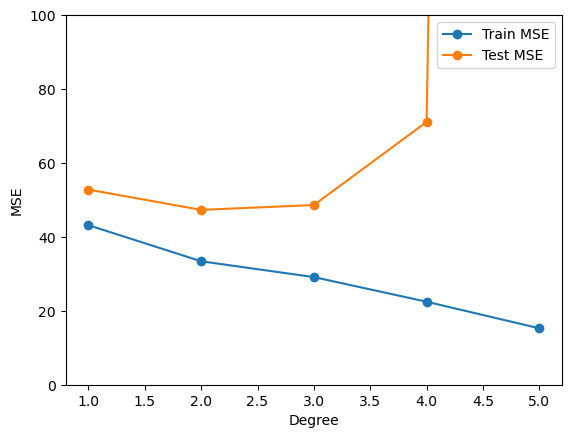

In [114]:
# plot the MSEs
print(train_MSEs)
print(test_MSEs)
plt.plot(degrees, train_MSEs, label="Train MSE", marker="o")
plt.plot(degrees, test_MSEs, label="Test MSE", marker="o")
plt.ylim(0, 100)
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()

[0.6404478862437788, 0.7218235771302075, 0.757497339759409, 0.8129817367134021, 0.8729052429479085]
[0.5897498926345806, 0.6323343907968991, 0.6221984194924806, 0.44750589914209904, -13.84812796928028]


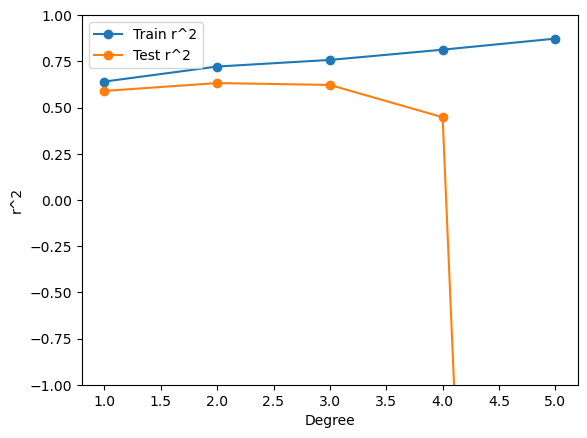

In [115]:
# Plot the r^2s
print(train_r2s)
print(test_r2s)
plt.plot(degrees, train_r2s, label="Train r^2", marker="o")
plt.plot(degrees, test_r2s, label="Test r^2", marker="o")
plt.ylim(-1, 1)
plt.xlabel("Degree")
plt.ylabel("r^2")
plt.legend()
plt.show()